In [41]:
import numpy as np
import  matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
x = np.load('data/X.npy')[:1000]
y = np.load('data/Y.npy')[:1000]

In [43]:
print(f'Shape of x : {x.shape}')
print(f'Shape of y : {y.shape}')

Shape of x : (1000, 400)
Shape of y : (1000, 1)


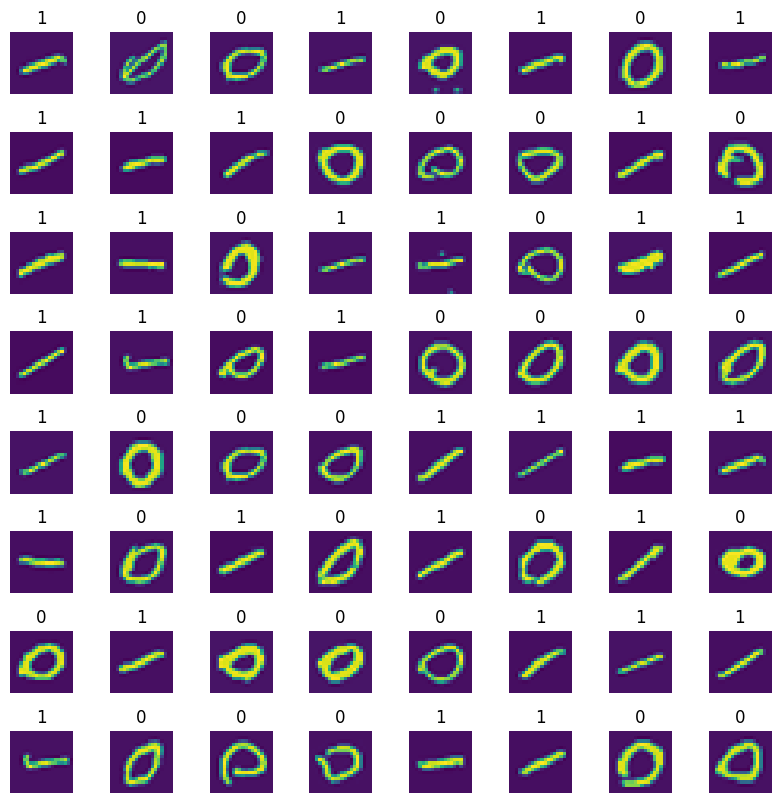

In [44]:
m,n = x.shape
fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat): #type:ignore
    randIndex = np.random.randint(m)
    xReshaped = x[randIndex].reshape(20,20)
    ax.imshow(xReshaped)
    ax.set_title(y[randIndex,0])
    ax.set_axis_off()

In [45]:
model = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25,activation='sigmoid'),
    tf.keras.layers.Dense(15,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ],name='myModel'
)

In [46]:
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [47]:
layer1Params = 400*25+25
layer2Params = 25*15+15
layer3Params = 15*1+1
print(f'Layer 1 : {layer1Params}')
print(f'Layer 2 : {layer2Params}')
print(f'Layer 3 : {layer3Params}')

Layer 1 : 10025
Layer 2 : 390
Layer 3 : 16


In [48]:
layer1,layer2,layer3 = model.layers

In [49]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()
print(f'w1 shape : {w1.shape},b1 shape : {b1.shape}')
print(f'w2 shape : {w2.shape},b2 shape : {b2.shape}')
print(f'w3 shape : {w3.shape},b3 shape : {b3.shape}')

w1 shape : (400, 25),b1 shape : (25,)
w2 shape : (25, 15),b2 shape : (15,)
w3 shape : (15, 1),b3 shape : (1,)


In [50]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
model.fit(x,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6335
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4816
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3318
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2285
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1290
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1040
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 13/20
32/32 [==============================

In [51]:
prediction = model.predict(x[0].reshape(1,400))
print(f'predicting a 0 : {prediction[0,0]}')
prediction = model.predict(x[500].reshape(1,400))
print(f'predicting a 1 : {prediction[0,0]}')

1/1 [==============================] - 0s 51ms/step
predicting a 0 : 0.026472004130482674
1/1 [==============================] - 0s 19ms/step
predicting a 1 : 0.9886360764503479


In [52]:
for i in range(1000):
    prediction = model.predict(x[i].reshape(1,400))
    print(f'{i+1}. predicted {prediction[0,0]:.0f}\t actual : {y[i,0]}')

1/1 [==============================] - 0s 18ms/step
1. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
2. predicted 0	 actual : 0
1/1 [==============================] - 0s 18ms/step
3. predicted 0	 actual : 0
1/1 [==============================] - 0s 18ms/step
4. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
5. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
6. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
7. predicted 0	 actual : 0
1/1 [==============================] - 0s 19ms/step
8. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
9. predicted 0	 actual : 0
1/1 [==============================] - 0s 16ms/step
10. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
11. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/step
12. predicted 0	 actual : 0
1/1 [==============================] - 0s 17ms/st

In [53]:
def predictValue(prediction):
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    print(f'Prediction after Threshold: {yhat}')

1/1 [==============================] - 0s 22ms/step


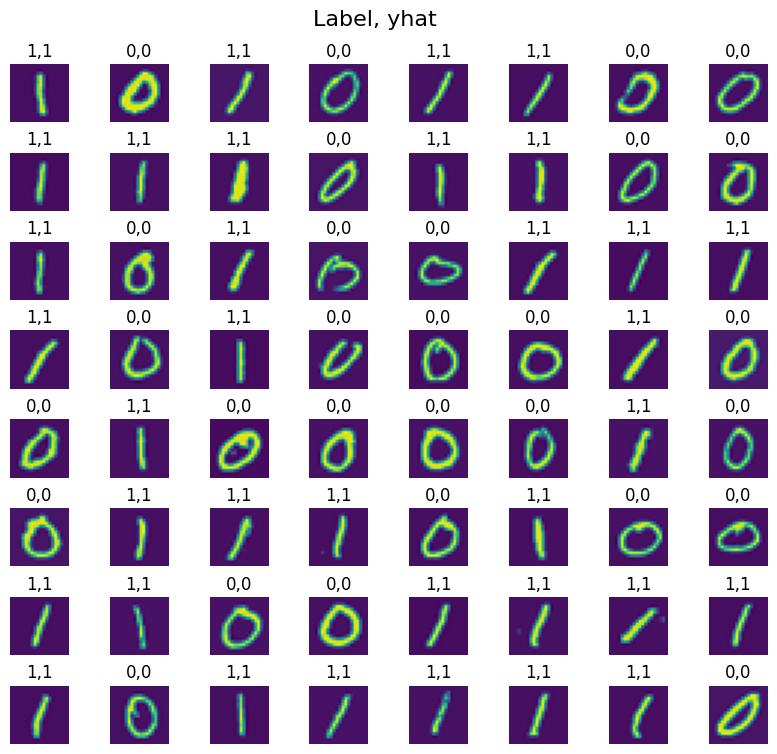

In [54]:
fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0,0.03,1,0.92]) #type:ignore
for i,ax in enumerate(axes.flat): #type:ignore
    randIndex = np.random.randint(m)
    xReshaped = x[randIndex].reshape(20,20).T
    ax.imshow(xReshaped)
    prediction = model.predict(x[randIndex].reshape(1,400))
    if prediction>=0.5:
        yhat = 1
    else:
        yhat=0
    ax.set_title(f'{y[randIndex,0]},{yhat}')
    ax.set_axis_off()
fig.suptitle('Label, yhat',fontsize=16)
plt.show()

In [57]:
def g(z):
    return 1/(1+np.exp(-z))

In [58]:
def myDense(aIn,W,b,g):
    units = W.shape[1]
    aOut = np.zeros(units)
    for i in range(units):
        w = W[:,i]
        z = np.dot(w,aIn)+b[i]
        aOut[i] = g(z)
    return aOut

In [59]:
def mySequential(x,w1,b1,w2,b2,w3,b3):
    a1 = myDense(x,w1,b1,g)
    a2 = myDense(a1,w2,b2,g)
    a3 = myDense(a2,w3,b3,g)
    return a3

In [61]:
w1Temp,b1Temp = layer1.get_weights()
w2Temp,b2Temp = layer2.get_weights()
w3Temp,b3Temp = layer3.get_weights()

In [62]:
prediction = mySequential(x[0],w1Temp,b1Temp,w2Temp,b2Temp,w3Temp,b3Temp)
if prediction >=0.5:
    yhat = 1
else:
    yhat = 0
print(f'yhat = {yhat} label = {y[0,0]}')
prediction = mySequential(x[500],w1Temp,b1Temp,w2Temp,b2Temp,w3Temp,b3Temp)
if prediction >=0.5:
    yhat = 1
else:
    yhat = 0
print(f'yhat = {yhat} label = {y[500,0]}')

yhat = 0 label = 0
yhat = 1 label = 1


1/1 [==============================] - 0s 20ms/step


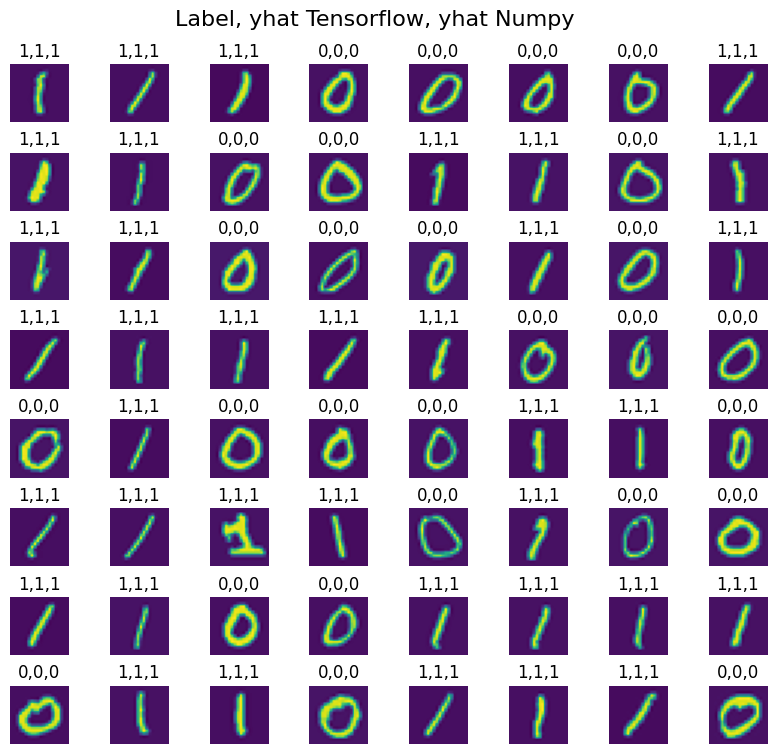

In [64]:
# You do not need to modify anything in this cell

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #type:ignore

for i,ax in enumerate(axes.flat):#type:ignore
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped)

    # Predict using the Neural Network implemented in Numpy
    my_prediction = mySequential(x[random_index], w1Temp,b1Temp,w2Temp,b2Temp,w3Temp,b3Temp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(x[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [65]:
def myDenseV(A_in, W, b, g): 
    z = np.matmul(A_in,W)+b
    A_out = g(z)
    return(A_out)

In [66]:
def mySequentialV(X, W1, b1, W2, b2, W3, b3):
    A1 = myDenseV(X,  W1, b1, g)
    A2 = myDenseV(A1, W2, b2, g)
    A3 = myDenseV(A2, W3, b3, g)
    return(A3)

In [67]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [69]:
Prediction = mySequentialV(x, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(1000, 1)

In [71]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0,0], "predict a one: ", Yhat[500,0])

predict a zero:  0 predict a one:  1


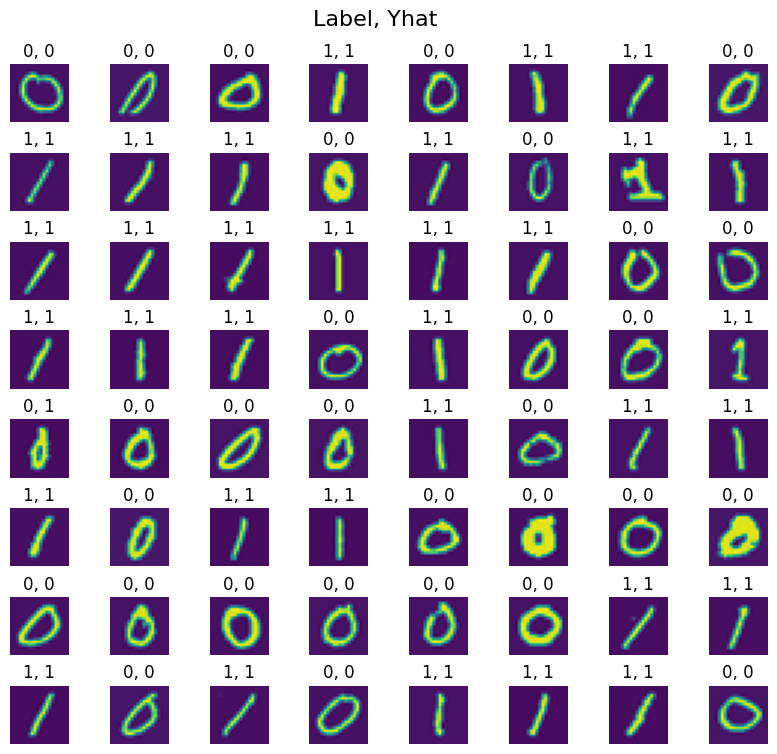

In [73]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #type:ignore

for i, ax in enumerate(axes.flat): #type:ignore
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped)
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

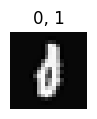

In [74]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = x[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()